### Question 1: 

Coins with values 1 through N (inclusive) are placed into a bag. All the coins from the bag are iteratively drawn (without replacement) at random. For the first coin, you are paid the value of the coin. For subsequent coins, you are paid the absolute difference between the drawn coin and the previously drawn coin. For example, if you drew 5,3,2,4,1 your payments would be 5,2,1,2,3 for a total payment of 13.

In [1]:
import random
import numpy as np
import itertools

def total_payment(n, a):
    payments = []
    pass_payments = []
    num = list(range(1,n+1))
    num_bags = list(itertools.permutations(num))
    for bag in num_bags:
        bag = list(bag)
        payment = []
        payment.append(bag[0])
        for i in range(1, n):
            p = abs(bag[i] - bag[i-1])
            payment.append(p)
        payments.append(sum(payment))
        
        if sum(payment) >= a:
            pass_payments.append(payment)
        
            
    return [np.mean(payments), np.std(payments), float(len(pass_payments))/float(len(payments))]

a = total_payment(10,45)
print "The mean of N=10 is", a[0], "and the standard deviation of N=10 is", a[1]
print "The probability to obtain payments that are >=45 for N=10 is", a[2]

The mean of N=10 is 38.5 and the standard deviation of N=10 is 6.36527035299
The probability to obtain payments that are >=45 for N=10 is 0.181795634921


In [9]:
#Generate mean values, standard deviation values, and percentage of payments that is greater than 160
mean_list = []
std_list = []
perc_list = []
for i in range(1, 11):
    results = total_payment(i, 45)
    mean_list.append(results[0])
    std_list.append(results[1])
    perc_list.append(results[2])

In [8]:
total_payment(10,160)

[38.5, 6.3652703529910388, 0.0]

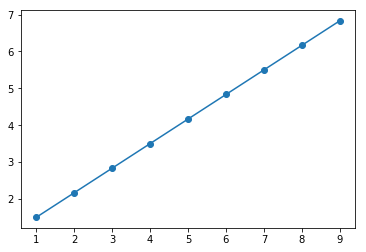

[38.5, 46.0, 54.166666666666671, 63.000000000000007, 72.500000000000014, 82.666666666666686, 93.500000000000028, 105.00000000000003, 117.1666666666667, 130.00000000000003, 143.50000000000003]


In [3]:
#Obtain mean difference list; then use linear relationship between N and the mean difference to get mean value for N=20
mean_diff_list = []
for i in range(1, 10):
    mean_diff = mean_list[i]-mean_list[i-1]
    mean_diff_list.append(mean_diff)

#Generate scatter plot for N and mean difference, fit the plot to y=mx+b
import matplotlib.pyplot as plt
plt.scatter(x=range(1,10), y=mean_diff_list)

fit = np.polyfit(range(1,10), mean_diff_list, 1)
fit_fn = np.poly1d(fit)
predict = fit_fn(range(1,10))

#Plot prediction on the same plot as mean diff calculated
plt.plot(range(1,10), predict)
plt.show()

#Obtain mean diff for up to 20
mean_diff_upto20 = fit_fn(range(10,20))
mean_upto20 = [a[0]]

#Print out mean for N=20
for i in range(len(mean_diff_upto20)):
    next_mean = mean_upto20[i]+ mean_diff_upto20[i]
    mean_upto20.append(next_mean)
    
print mean_upto20

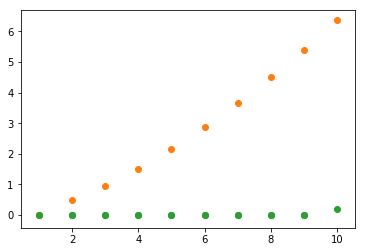

In [10]:
#Generate plot for std_list
plt.scatter(x=range(1,11), y=std_list)
plt.scatter(x=range(1,11), y=perc_list)
plt.show()

In [11]:
#Obtain percent difference list; then use linear relationship between N and the perc difference to get new percfor N=20
perc_diff_list = []
for i in range(1, 10):
    perc_diff = perc_list[i]-perc_list[i-1]
    perc_diff_list.append(perc_diff)

print perc_list
plt.scatter(x=range(1,10), y=perc_diff_list)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0015873015873015873, 0.1817956349206349]


### Question 2:

The U.S. Department of Education released a publicly available dataset on academic institutions that contains information related to their academics, admission, cost, student demographics, etc. The data can be downloaded from the College Scorecard website. Please download the data and answer the questions below. You may find it helpful to refer to the documentation.

NOTE: For the following questions, unless otherwise specified, use data from all years and consider satellite campuses as separate institutions. In other words, you should consider institutions with different 8 digit identification numbers, assigned by the U.S. Department of Education's Office of Postsecondary Education, separately.